In [2]:
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [3]:
#  Abrindo o dataset
df = pd.read_excel(r"C:\Users\sabri\ipeadata[09-11-2023-07-57].xls")
df.head()

,Data,Sondagem Industrial - produção industrial - indústria de transformação - estoques - efetivo/planejado - índice - - - Confederação Nacional da Indústria - CNI12_INDTP12 -
0,2010.01,48.2
1,2010.02,48.6
2,2010.03,48.3
3,2010.04,48.5
4,2010.05,49.1


In [37]:
#  Agora preciso entender com que tipo de dado estou trabalhando
df.dtypes
#  Percebo que a coluna data já está em um formato reconhecido como datetime, o que permite ir para a próxima etapa.

indice_efetivo_planejado    float64
dtype: object

In [5]:
#  Quantos valores faltantes têm?
df.isna().sum()

Data                                                                                                                                                                            0
Sondagem Industrial - produção industrial - indústria de transformação -  estoques  - efetivo/planejado - índice - - - Confederação Nacional da Indústria - CNI12_INDTP12 -     0
dtype: int64

In [7]:
#  O formato de data utilizado não é o formato lido pelo pandas automaticamente.
#  Por isso são necessárias algumas adaptações para que 1 - a leitura ocorra corretamente e 2 - a data seja usada como índice

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #  Função que converte os valores de data para a leitura pandas.
df = pd.read_excel(r"C:\Users\sabri\ipeadata[09-11-2023-07-57].xls", parse_dates=False, index_col='Data',date_parser=dateparse) 
df.head() #  index_col = 'Data' -> séries temporais utilizando pandas têm os dados de data como índices

,Sondagem Industrial - produção industrial - indústria de transformação - estoques - efetivo/planejado - índice - - - Confederação Nacional da Indústria - CNI12_INDTP12 -
Data,
2010.01,48.2
2010.02,48.6
2010.03,48.3
2010.04,48.5
2010.05,49.1


In [8]:
#  Renomeando a coluna para facilitar as demais etapas
df.columns = ['indice_efetivo_planejado']
df.sort_index(inplace=True)


,indice_efetivo_planejado
Data,
2010.01,48.2
2010.02,48.6
2010.03,48.3
2010.04,48.5
2010.05,49.1


In [23]:
df.shape

(165, 1)

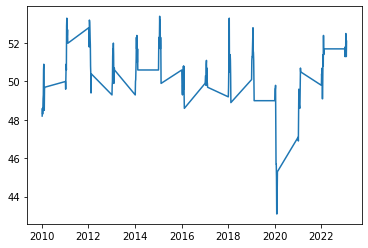

In [13]:
# Plotando a série temporal
plt.plot(df)

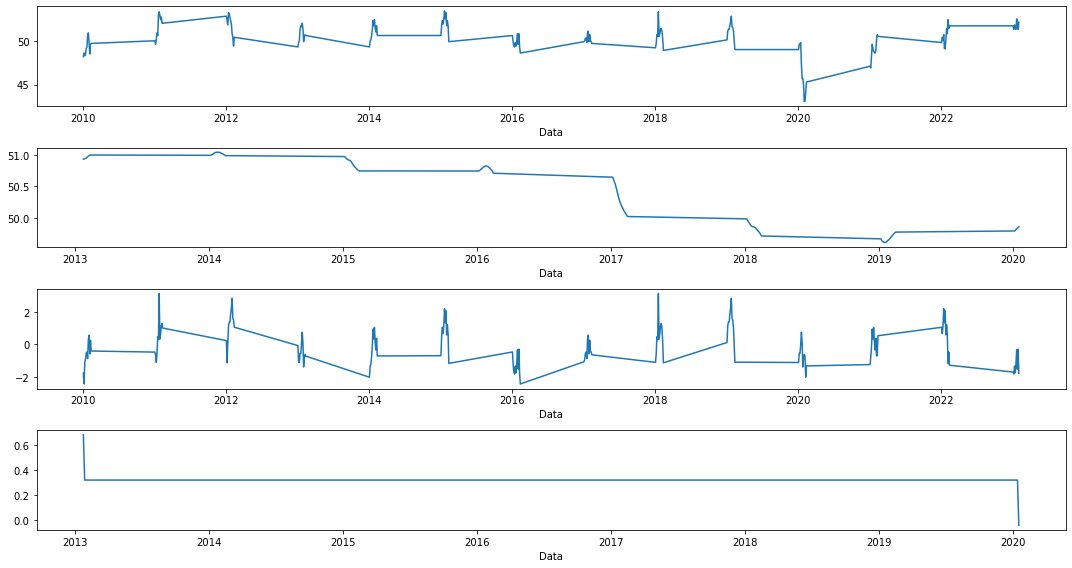

In [35]:
#  Decompor a série temporal: observado; tendência; sazonal; resíduo

result_1 = seasonal_decompose(df, model = 'additive', period = 82) #  decomposição aditiva

#  Plotando a decomposição

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax = ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

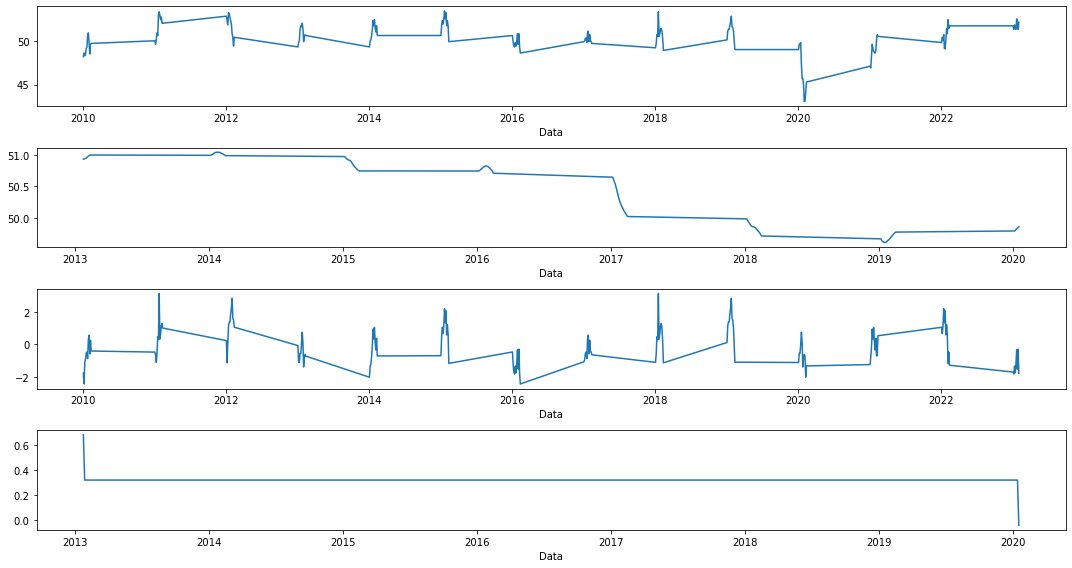

In [29]:
#  Decompor a série temporal: observado; tendência; sazonal; resíduo

result_2 = seasonal_decompose(df, model = 'multiplicative', period = 82) #  decomposição multiplicativa

#  Plotando a decomposição

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax = ax1)
result.trend.plot(ax = ax2)
result.seasonal.plot(ax = ax3)
result.resid.plot(ax = ax4)
plt.tight_layout()